# Part II - (Prosper Loan Data Exploration)
## by (Lawrence Appiah-Nuamah)

>I am very much interest to find out what features or factors that affect a loan's outcome status?



## Investigation Overview


> Currently, I am looking at these features: Occupation, BorrowerStatus, IncomeRange, AvailableBankCardCredit, LoanOriginalAmount, EmploymentStatus, EmploymentStatusDuration, BorrowerRate, StatedMonthlyIncome, DebtToIncomeRatio,Term, BorrowerAPR,and LoanNumber as an index.



## Dataset Overview

> This document explores a dataset containing  approximately 56000 Loans of people and with about 81 variables such as the borrower rate (or interest rate), current loan status, borrower income, loan amount and many others.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData.csv', low_memory=False)
df

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,258.0
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,41.0
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,158.0
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55262,BA1D3566574197876DCC48C,687825,2012-12-17 15:49:01.583000000,NaN,36,Current,NaN,0.24758,0.2099,0.1999,...,-149.78,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,261.0
55263,A0FA3392211419017FDE6A5,147983,2007-06-06 16:49:54.177000000,B,36,Completed,2010-06-13 00:00:00,0.15792,0.1490,0.1240,...,-33.13,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,65.0
55264,A0FB3588549152778C6F0B6,899274,2013-09-11 10:04:40.400000000,NaN,36,Current,NaN,0.33215,0.2925,0.2825,...,-12.12,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
55265,69603483509780973F7A37E,456079,2010-04-27 20:22:19.820000000,NaN,36,Completed,2013-05-06 00:00:00,0.07439,0.0710,0.0610,...,-55.95,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,129.0


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

In [4]:
#We want to select some few variables and analyse it 

new_df = df[['ListingCreationDate', 'Occupation', 'ProsperScore' ,'BorrowerState', 'IncomeRange', 'AvailableBankcardCredit', 'ClosedDate', 'LoanOriginalAmount', 'EmploymentStatus', 'ListingCategory (numeric)', 'LenderYield', 'EmploymentStatusDuration', 'BorrowerRate', 'LoanStatus','LP_InterestandFees','StatedMonthlyIncome','MonthlyLoanPayment', 'DebtToIncomeRatio', 'LP_ServiceFees','Term', 'BorrowerAPR']]
new_df

,ListingCreationDate,Occupation,ProsperScore,BorrowerState,IncomeRange,AvailableBankcardCredit,ClosedDate,LoanOriginalAmount,EmploymentStatus,ListingCategory (numeric),...,EmploymentStatusDuration,BorrowerRate,LoanStatus,LP_InterestandFees,StatedMonthlyIncome,MonthlyLoanPayment,DebtToIncomeRatio,LP_ServiceFees,Term,BorrowerAPR
0,2007-08-26 19:09:29.263000000,Other,NaN,CO,"$25,000-49,999",1500.0,2009-08-14 00:00:00,9425.0,Self-employed,0.0,...,2.0,0.1580,Completed,1971.1400,3083.333333,330.43,0.17,-133.18,36,0.16516
1,2014-02-27 08:28:07.900000000,Professional,7.0,CO,"$50,000-74,999",10266.0,NaN,10000.0,Employed,2.0,...,44.0,0.0920,Current,0.0000,6125.000000,318.93,0.18,0.00,36,0.12016
2,2007-01-05 15:00:47.090000000,Other,NaN,GA,Not displayed,NaN,2009-12-17 00:00:00,3001.0,Not available,0.0,...,NaN,0.2750,Completed,1185.6300,2083.333333,123.32,0.06,-24.20,36,0.28269
3,2012-10-22 11:02:35.010000000,Skilled Labor,9.0,GA,"$25,000-49,999",30754.0,NaN,10000.0,Employed,16.0,...,113.0,0.0974,Current,1052.1100,2875.000000,321.45,0.15,-108.01,36,0.12528
4,2013-09-14 18:38:39.097000000,Executive,4.0,MN,"$100,000+",695.0,NaN,15000.0,Employed,2.0,...,44.0,0.2085,Current,1256.6300,9583.333333,563.97,0.26,-60.27,36,0.24614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55262,2012-12-17 15:49:01.583000000,Other,7.0,OH,"$25,000-49,999",13080.0,NaN,15000.0,Other,3.0,...,83.0,0.2099,Current,3152.3100,2750.000000,565.05,0.63,-149.78,36,0.24758
55263,2007-06-06 16:49:54.177000000,Other,NaN,AL,"$25,000-49,999",34.0,2010-06-13 00:00:00,2000.0,Full-time,0.0,...,309.0,0.1490,Completed,444.0000,2500.000000,69.23,0.26,-33.13,36,0.15792
55264,2013-09-11 10:04:40.400000000,Sales - Retail,2.0,NJ,"$25,000-49,999",2010.0,NaN,3000.0,Employed,1.0,...,80.0,0.2925,Current,351.9959,3000.000000,126.13,0.14,-12.12,36,0.33215
55265,2010-04-27 20:22:19.820000000,Professional,10.0,VA,"$25,000-49,999",13693.0,2013-05-06 00:00:00,3500.0,Full-time,3.0,...,23.0,0.0710,Completed,397.3600,4150.833333,108.23,0.04,-55.95,36,0.07439


## (BorrowerAPR vs LoanStatus)

> This is to investigate if the Interest Rate (BorrowerAPR) affect the outcome of the Loan thus the LoanStatus

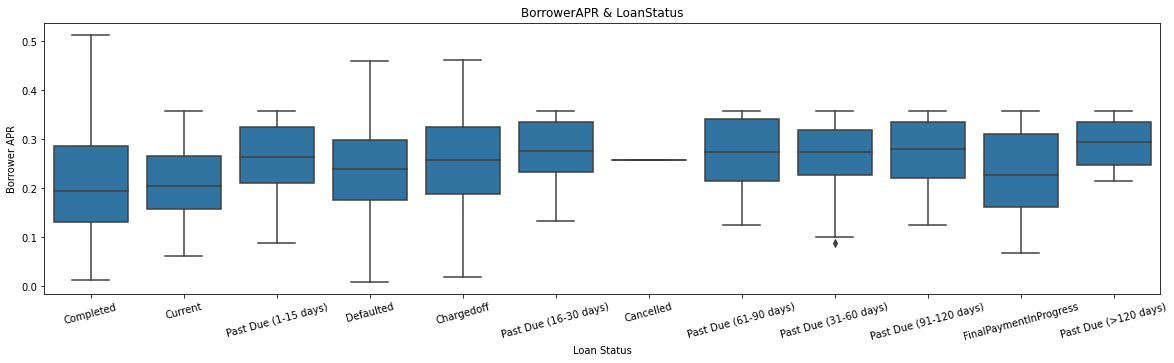

In [5]:
# Borrower APR vs Status of Loan 
base_color = sb.color_palette()[0]
plt.figure(figsize = [20, 5])
sb.boxplot(data=new_df,y='BorrowerAPR',x='LoanStatus',color=base_color);
plt.title('BorrowerAPR & LoanStatus');
plt.ylabel('Borrower APR');
plt.xlabel('Loan Status');
plt.xticks(rotation=15);

On BorrowerAPR vs LoanStatus graph we notice that Current and completed loans have lower rate than the past-due loans and have lower mean. 

## (LenderYield vs Borrower APR vs ProsperRating)


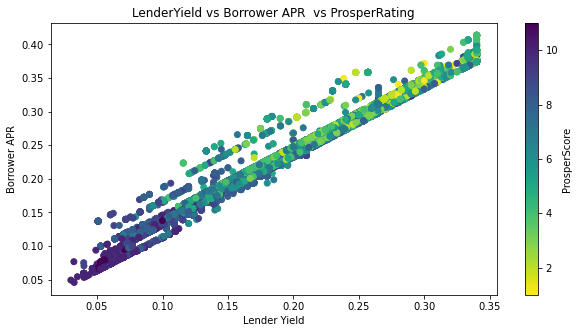

In [6]:
# LenderYield vs Borrower APR  vs ProsperRating
plt.figure(figsize = [10, 5])
plt.scatter(data=new_df,x='LenderYield',y = 'BorrowerAPR',c='ProsperScore',cmap = 'viridis_r')
plt.colorbar(label = 'ProsperScore');
plt.title('LenderYield vs Borrower APR  vs ProsperRating');
plt.xlabel('Lender Yield');
plt.ylabel('Borrower APR');

We can see that the relationship between all variables are clear. Borrower APR and Lender yield are directly positively correlated as when the interest borrowers pays more , the lender yield will increase. Higher the prosper score lower will lower borrower apr and then the lender yield will also be lower.

## (Borrower APR vs Employment status)

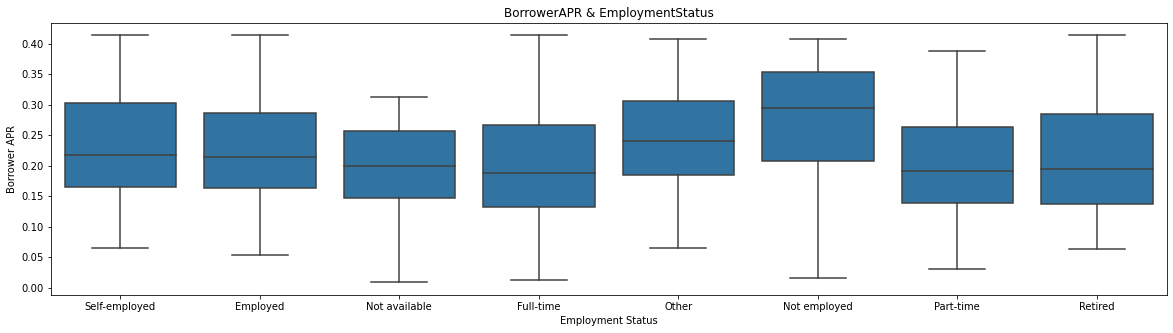

In [7]:
# Borrower APR vs Employment status
plt.figure(figsize = [20, 5])

sb.boxplot(data=new_df,y='BorrowerAPR',x='EmploymentStatus',color=base_color);
plt.title('BorrowerAPR & EmploymentStatus');
plt.ylabel('Borrower APR');
plt.xlabel('Employment Status');

- On BorrowerAPR vs LoanStatus graph we notice that Current and completed loans have lower rate than the past-due loans and have lower mean. 

- On BorrowerAPR vs Employment status graph we notice that Employed people have lower IQR than not employed. 

## (Borrower APR vs Loan Category)

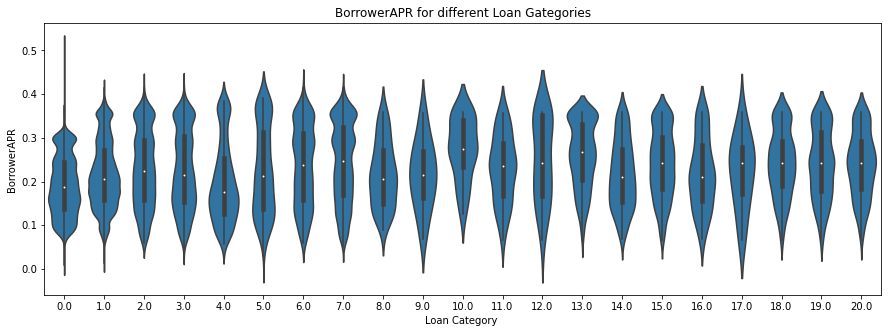

In [8]:
plt.figure(figsize = [15, 5])
sb.violinplot(data=new_df,x='ListingCategory (numeric)', y='BorrowerAPR',color=base_color);
plt.title('BorrowerAPR for different Loan Gategories')
plt.xlabel('Loan Category ');
plt.ylabel('BorrowerAPR');

- We can see that Cosmetic Procedure are given higer interest rates with data distributed well in it.

- Listing Category: The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans

## (LoanStatus Vs BorrowerAPR in each EmploymentStatus)


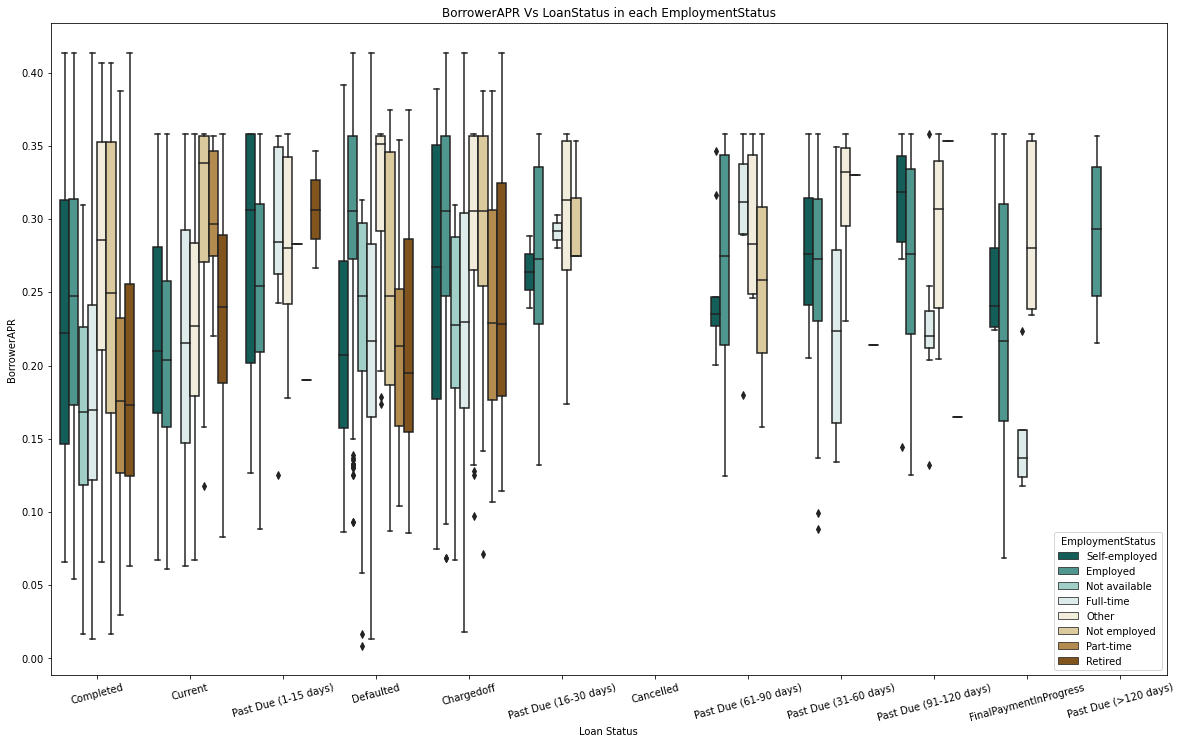

In [9]:
# LoanStatus Vs BorrowerAPR in each EmploymentStatus
plt.figure(figsize=[20,12])
sb.boxplot(x="LoanStatus", y="BorrowerAPR", hue="EmploymentStatus", data=new_df, palette="BrBG_r");
plt.title('BorrowerAPR Vs LoanStatus in each EmploymentStatus');
plt.xlabel('Loan Status');
plt.ylabel('BorrowerAPR');
plt.xticks(rotation = 15);

- According to the visualization with  each category of loan status, the lowest APR is for Employed and Full-time. Whereas highest APR is for Not employed.
- Also, most of the high BorrowerAPR are on the chargeoff, completed and current.
- We notice some outliers in chargeoff and defaulted loan status and very few on current and the past due(16-30 days).

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [1]:
# Use this command if you are running this file in local
#!jupyter nbconvert <Part_II_Filename>.ipynb --to slides --post serve --no-input --no-prompt

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
